In [1]:
%matplotlib inline
import os,re,glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy.optimize import curve_fit
matplotlib.style.use('seaborn-darkgrid')
params = {'legend.fontsize':15,'axes.labelsize':25,'axes.titlesize':25,
          'xtick.labelsize':20,'ytick.labelsize':20,'errorbar.capsize' :4,
          'figure.figsize': [1.61803*4.0, 4.0],'figure.dpi': 144.0,
          'legend.handlelength': 1.0,}
plt.rcParams.update(params)

In [100]:
# This function gets data from a specified folder for different nutrient concentration and stores a csv
# a csv in data folder if not present.
def get_data_nonlinear(location,folders,delete=False):
    existing = []
    vel = pd.read_csv(location+'nonlinear_front_velocity')
    vel.set_index('C0',inplace=True)
    for f in folders:
        velocity = vel['velocity'][int(f)]
        csv_name = "data/nonlinear/C0.%02d.csv"%(int(f))
        if delete or not os.path.isfile(csv_name):
            name = location+f+"/stat.0"
            df = pd.read_table(name,names=['time','biomass','food','roughness'])
            df['time_scaled'] = df['time']*velocity
            df.to_csv(csv_name,index=False,float_format='%.5f')
        else:
            existing.append(f)
    if len(existing) :
        print(existing, "already exists.")
def get_data_linear(location,folders,C0,delete=False):
    existing = []
    vel = pd.read_csv(location+'linear_front_velocity')
    for i,(f,food) in enumerate(zip(folders,C0)):
        velocity = vel['velocity'][i]
        csv_name = "data/linear/C0.%02d.csv"%(food)
        if delete or not os.path.isfile(csv_name):
            name = location+f+"/stat.a"
            df = pd.read_table(name,names=['time','biomass','roughness'])
            df['time_scaled'] = df['time']*velocity
            df.to_csv(csv_name,index=False,float_format='%.5f')
        else:
            existing.append(f)
    if len(existing) :
        print(existing, "already exists.")
def create_plots(parameter,extension,C0,alpha=2.5,length=64):
    fig,ax = plt.subplots(1,figsize=(20,10))
    files = sorted(glob.glob('data/'+extension+'/*.csv'))
    for file,food in zip(files,C0):
        df = pd.read_csv(file)
        ax.plot(df['time_scaled']/length,df[parameter]*np.power(food,alpha),label=r"$C_0=$"+str(food))
    ax.legend(ncol=2)
    return fig,ax
def numericalsort(x):
    num = re.compile(r'(\d+)')
    parts = num.split(x)
    parts[1::2] = map(int,parts[1::2])
    return parts

def create_multi_plots(parameter,extension,C0,alpha=1,length=64):
    fig,axes = plt.subplots(5,2,figsize=(20,50))
    axes = axes.reshape(-1)
    files = sorted(glob.glob('data/'+extension+'/*.csv'))
    x = np.linspace(2.1,3,10)
    for alpha,ax in zip(x,axes):
        for file,food in zip(files,C0):
            df = pd.read_csv(file)
            ax.plot(df['time_scaled']/length,df[parameter]*np.power(food,alpha),label=str(food)+"_"+str(alpha))
        ax.legend(ncol=2)

In [73]:
folders = ['1','2','3','4','5','6','7','8']
get_data_nonlinear("/home/rana/Desktop/bac-grow/nonlinear-high-res/data/",folders,delete=False)

['1', '2', '3', '4', '5', '6', '7', '8'] already exists.


In [74]:
C0 = [1,2,3,4,5,6,7,8]

In [75]:
folders = ['0','1','2','3','4','5','6','7','8','9','10']
C0 = [1,2,4,6,8,10,12,14,16,18,20]
get_data_linear("/home/rana/Desktop/bac-grow/velocity-high-res/5.e-4/data/",folders,C0)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'] already exists.


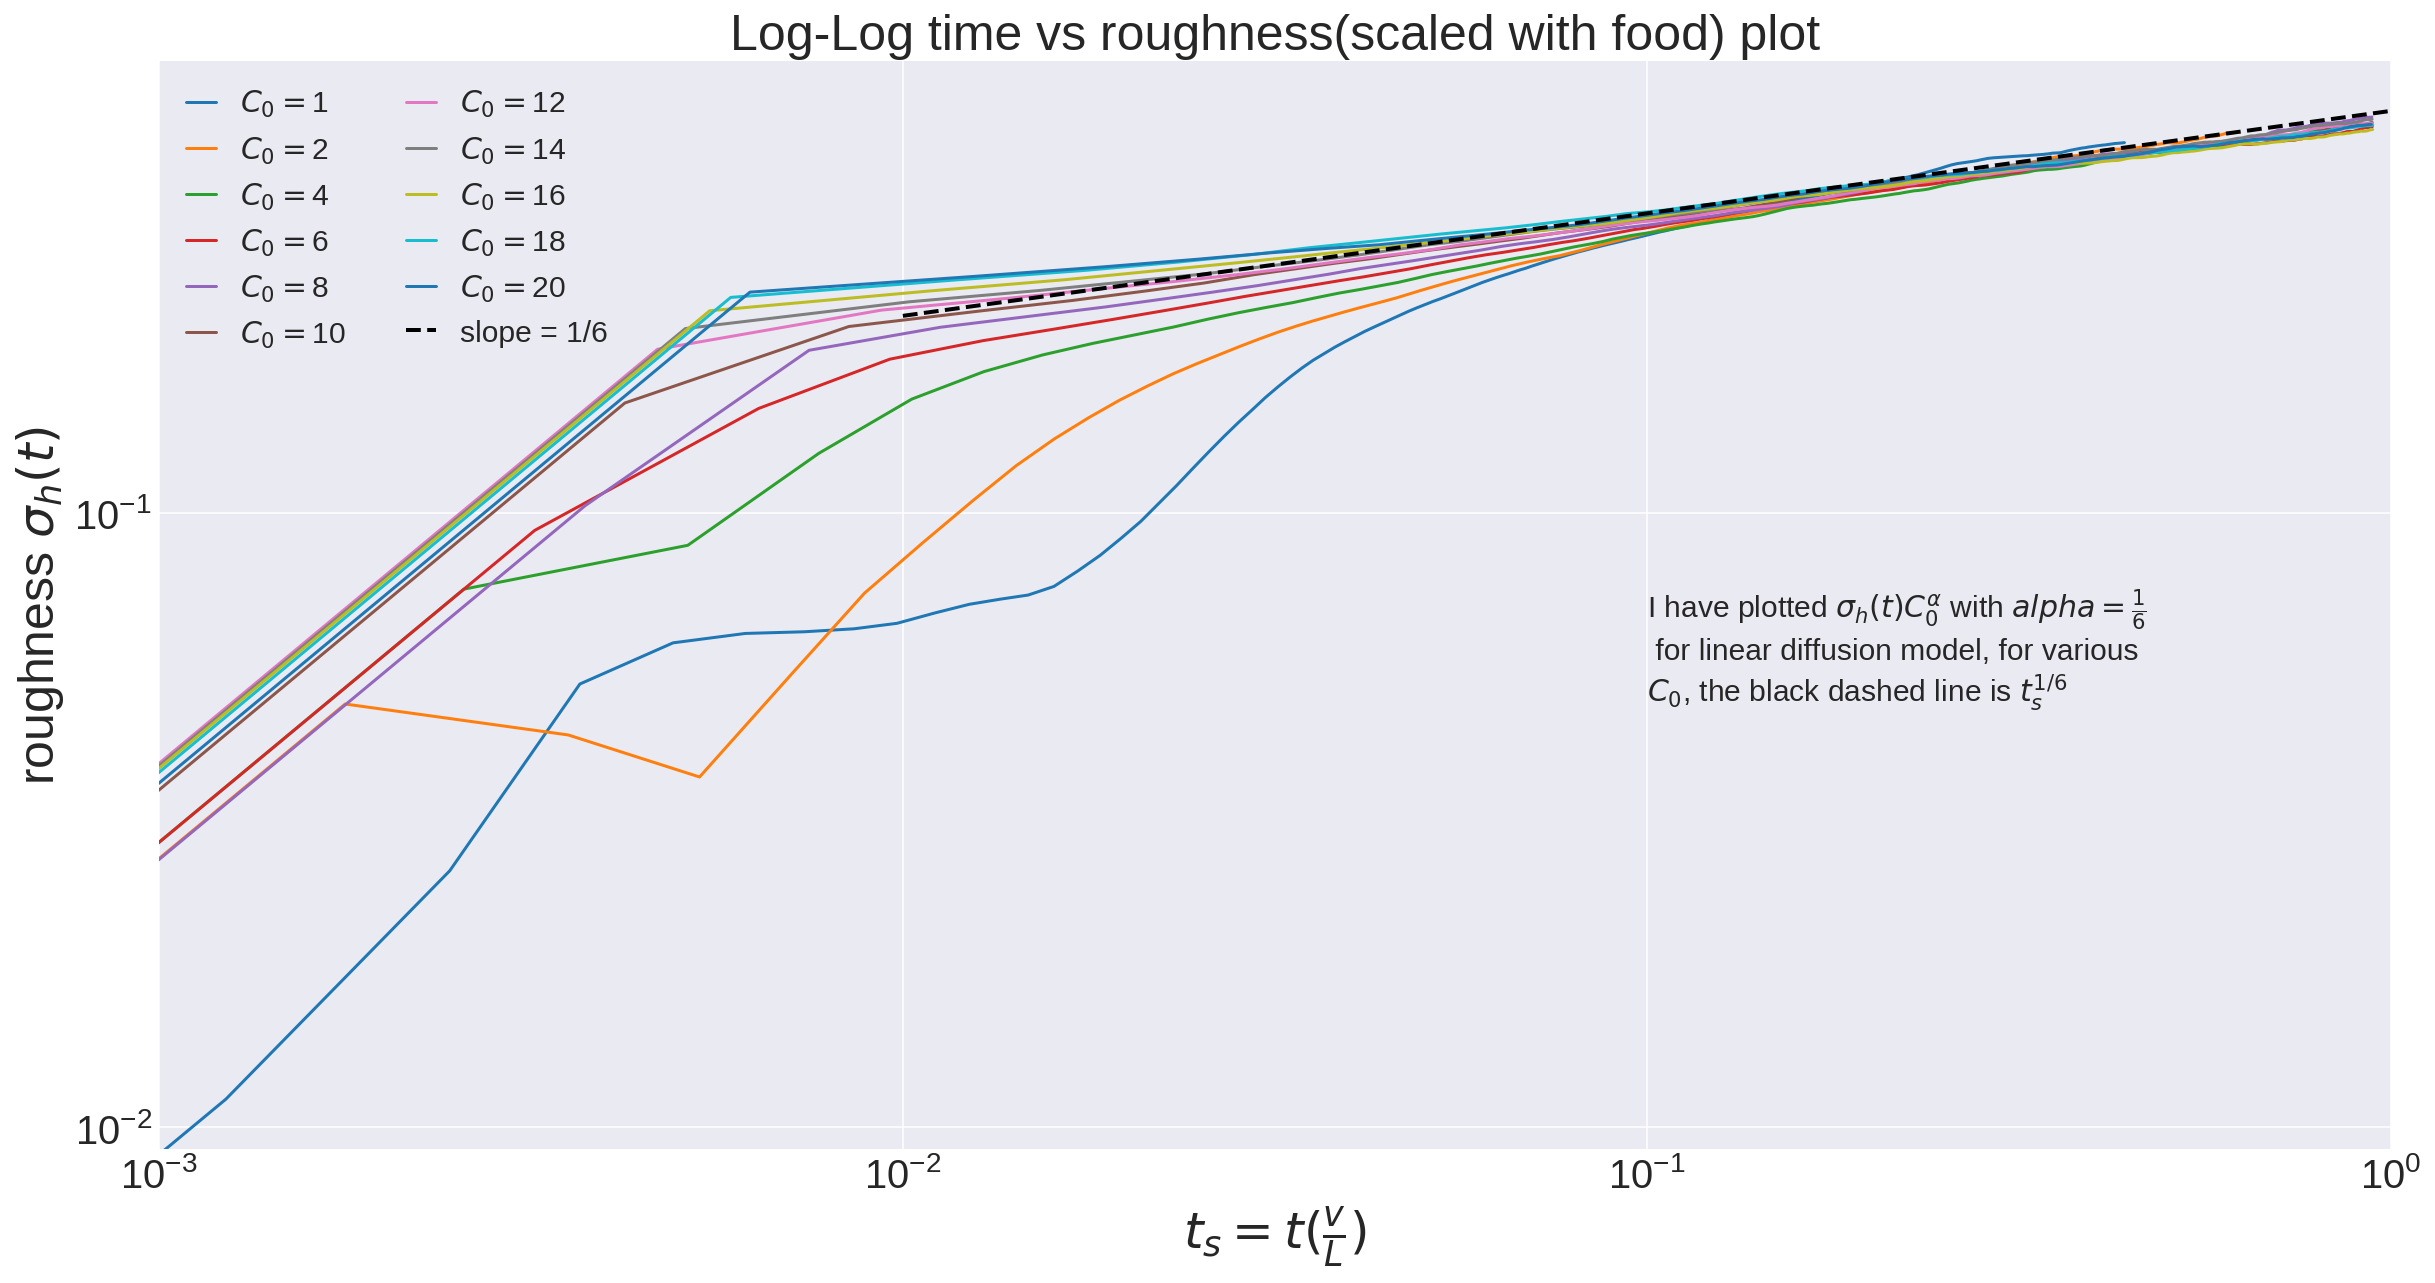

In [102]:
C0 = [1,2,4,6,8,10,12,14,16,18,20]
fig,ax = create_plots('roughness','linear',C0,alpha=1/6,length=1)
ax.set_xlim([0.001,1])
#ax.set_ylim([0.1,1])
ax.set_xscale('log')
ax.set_yscale('log')
x = np.linspace(0.01,1,100)
ax.plot(x,0.45*np.power(x,1/6),'--k',label='slope = 1/6',linewidth=2)
ax.set(title="Log-Log time vs roughness(scaled with food) plot",
       ylabel=r'roughness $\sigma_h(t)$',xlabel=r'$t_s = t(\frac{v}{L})$');
ax.text(x=0.1,y=0.05,fontsize=15,s=r'I have plotted $\sigma_h(t) C_0^{\alpha}$ with $alpha=\frac{1}{6}$'
        '\n for linear diffusion model, for various \n' r'$C_0$, the black dashed line is $t_s^{1/6}$')
ax.legend(loc=2,ncol=2)
fig.savefig("/home/rana/Desktop/log-log-plot.pdf")

In [43]:
x = np.linspace(1.1,3,20)

In [89]:
print("x\n y")

x
 y
